In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from scipy.stats import norm
from ds_utils import correlations as cors
import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_data = pd.read_csv("../data/raw/train.csv")

main_cols = ['SalePrice','Neighborhood','OverallQual','OverallCond','YearBuilt','YearRemodAdd','GrLivArea',
            'TotalBsmtSF','TotRmsAbvGrd','FullBath','GarageArea','BedroomAbvGr']

pre_data = raw_data[main_cols]

In [3]:
display(pre_data.shape)
display(pre_data.head())

(1460, 12)

,SalePrice,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GrLivArea,TotalBsmtSF,TotRmsAbvGrd,FullBath,GarageArea,BedroomAbvGr
0,208500,CollgCr,7,5,2003,2003,1710,856,8,2,548,3
1,181500,Veenker,6,8,1976,1976,1262,1262,6,2,460,3
2,223500,CollgCr,7,5,2001,2002,1786,920,6,2,608,3
3,140000,Crawfor,7,5,1915,1970,1717,756,7,1,642,3
4,250000,NoRidge,8,5,2000,2000,2198,1145,9,2,836,4


In [4]:
## Missing values
# msno.matrix(pre_data)
pre_data.isnull().sum().sum()

0

# Univariate analysis

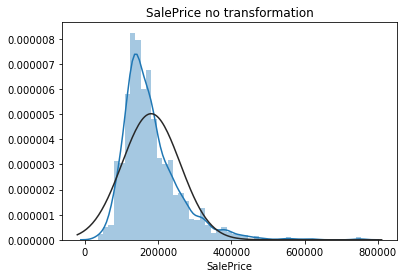

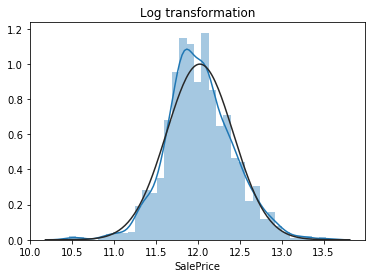

In [5]:
sns.distplot(pre_data['SalePrice'],fit=norm)
plt.title('SalePrice no transformation')
plt.show()


sns.distplot(np.log(pre_data['SalePrice']),fit=norm)
plt.title('Log transformation')
plt.show()
#Apply Log transformation to normalize it

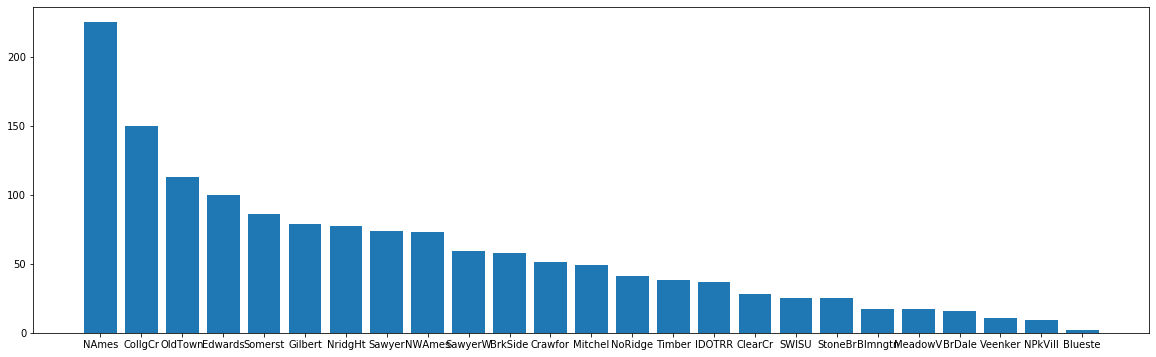

In [6]:
# sns.boxplot(pre_data['Neighborhood'],pre_data['SalePrice'])
fig = plt.figure(figsize=(20,6))
plt.bar(pre_data['Neighborhood'].value_counts().index,pre_data['Neighborhood'].value_counts().values)
plt.show()

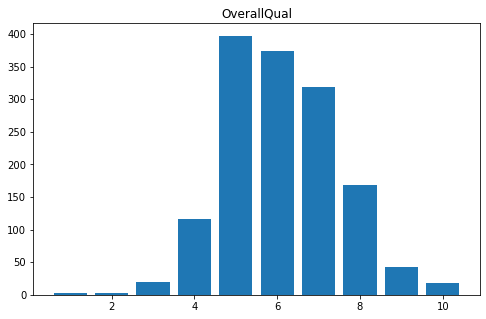

In [7]:
fig = plt.figure(figsize=(8,5))
plt.bar(pre_data['OverallQual'].value_counts().index,pre_data['OverallQual'].value_counts().values)
plt.title('OverallQual')
plt.show()

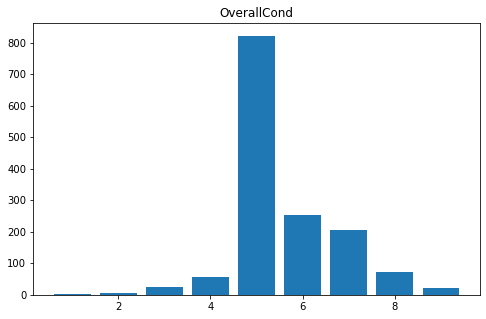

In [8]:
fig = plt.figure(figsize=(8,5))
plt.bar(pre_data['OverallCond'].value_counts().index,pre_data['OverallCond'].value_counts().values)
plt.title('OverallCond')
plt.show()

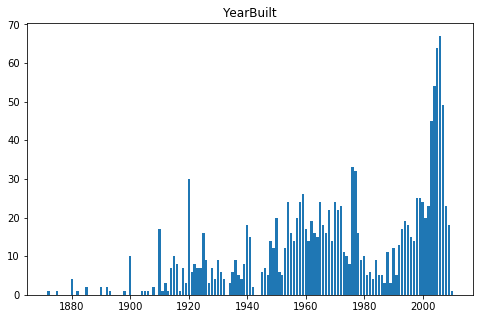

In [9]:
fig = plt.figure(figsize=(8,5))
plt.bar(pre_data['YearBuilt'].value_counts().index,pre_data['YearBuilt'].value_counts().values)
plt.title('YearBuilt')
plt.show()

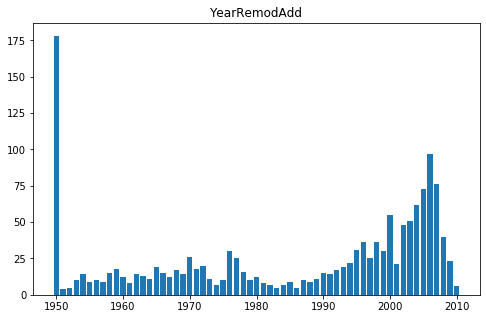

In [10]:
fig = plt.figure(figsize=(8,5))
plt.bar(pre_data['YearRemodAdd'].value_counts().index,pre_data['YearRemodAdd'].value_counts().values)
plt.title('YearRemodAdd')
plt.show()

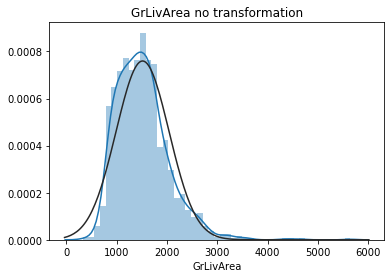

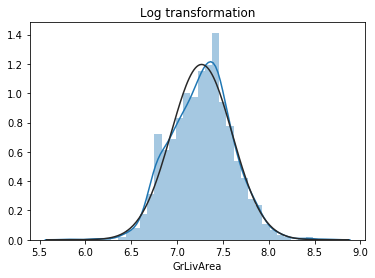

In [11]:
sns.distplot(pre_data['GrLivArea'],fit=norm)
plt.title('GrLivArea no transformation')
plt.show()


sns.distplot(np.log(pre_data['GrLivArea']),fit=norm)
plt.title('Log transformation')
plt.show()

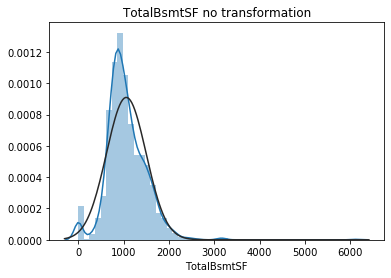

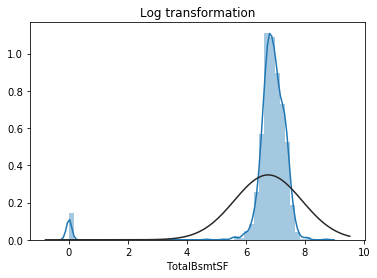

In [12]:
sns.distplot(pre_data['TotalBsmtSF'],fit=norm)
plt.title('TotalBsmtSF no transformation')
plt.show()


sns.distplot(np.log1p(pre_data['TotalBsmtSF']),fit=norm)
plt.title('Log transformation')
plt.show()

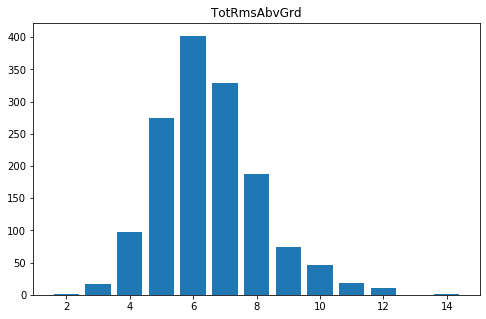

In [13]:
fig = plt.figure(figsize=(8,5))
plt.bar(pre_data['TotRmsAbvGrd'].value_counts().index,pre_data['TotRmsAbvGrd'].value_counts().values)
plt.title('TotRmsAbvGrd')
plt.show()


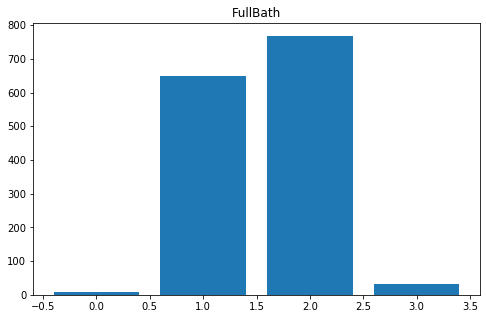

In [14]:
fig = plt.figure(figsize=(8,5))
field = 'FullBath'
plt.bar(pre_data[field].value_counts().index,pre_data[field].value_counts().values)
plt.title(field)
plt.show()

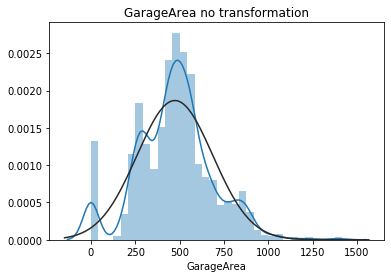

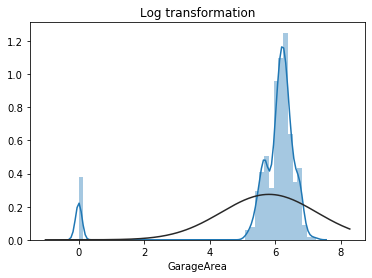

In [15]:
sns.distplot(pre_data['GarageArea'],fit=norm)
plt.title('GarageArea no transformation')
plt.show()


sns.distplot(np.log1p(pre_data['GarageArea']),fit=norm)
plt.title('Log transformation')
plt.show()

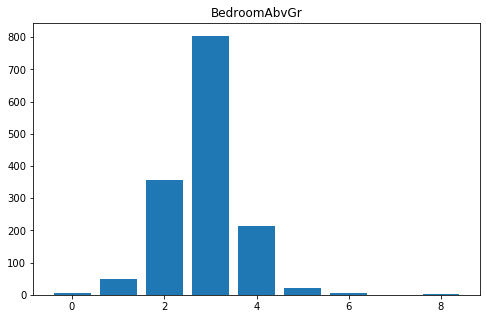

In [16]:
fig = plt.figure(figsize=(8,5))
field = 'BedroomAbvGr'
plt.bar(pre_data[field].value_counts().index,pre_data[field].value_counts().values)
plt.title(field)
plt.show()

# Bi Variate Analysis

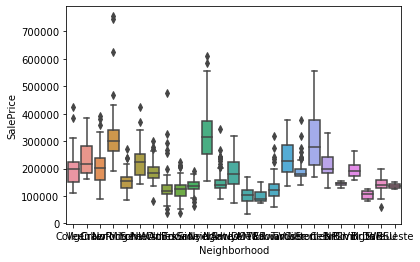

In [17]:
sns.boxplot(pre_data.Neighborhood,pre_data.SalePrice)

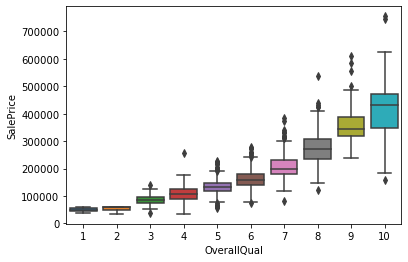

In [18]:
sns.boxplot(pre_data.OverallQual,pre_data.SalePrice)
plt.show()

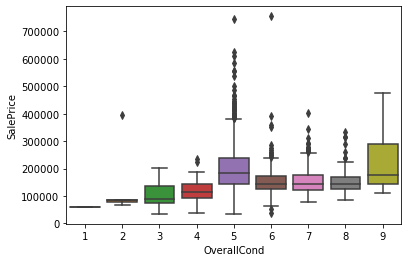

In [19]:
sns.boxplot(pre_data.OverallCond,pre_data.SalePrice)
plt.show()

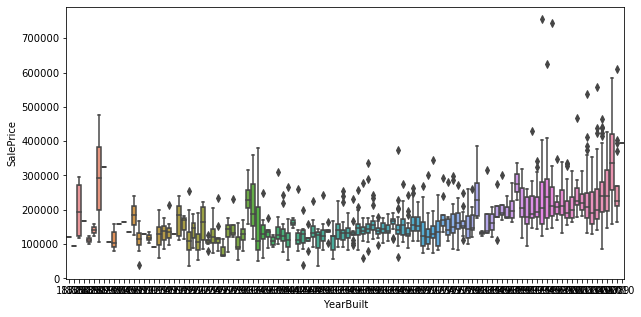

In [20]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(pre_data.YearBuilt,pre_data.SalePrice)
plt.show()

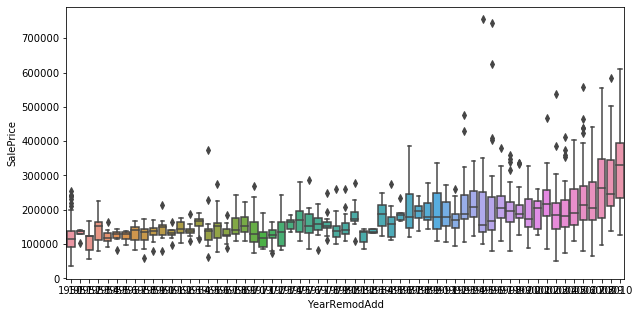

In [21]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(pre_data.YearRemodAdd,pre_data.SalePrice)
plt.show()

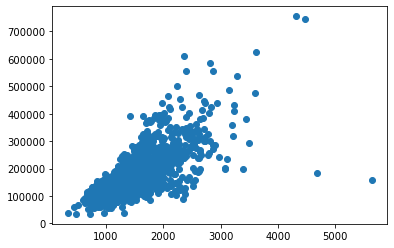

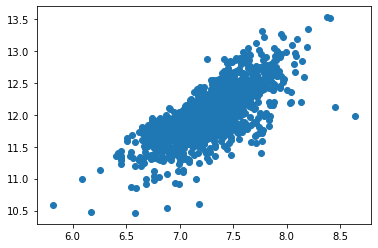

In [22]:
# fig = plt.figure(figsize=(10,5))
plt.scatter(pre_data.GrLivArea,pre_data.SalePrice)
plt.show()

plt.scatter(np.log1p(pre_data.GrLivArea),np.log(pre_data.SalePrice))
plt.show()
# Two outliers

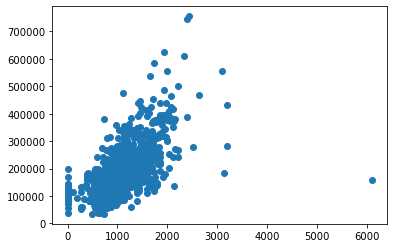

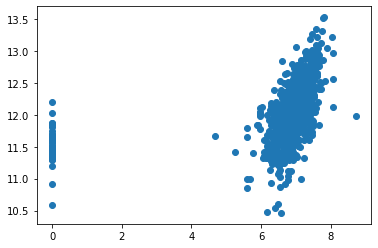

In [23]:
plt.scatter(pre_data.TotalBsmtSF,pre_data.SalePrice)
plt.show()

plt.scatter(np.log1p(pre_data.TotalBsmtSF),np.log(pre_data.SalePrice))
plt.show()
# One outlier

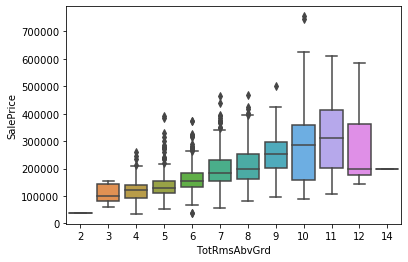

In [24]:
sns.boxplot(pre_data.TotRmsAbvGrd,pre_data.SalePrice)
plt.show()

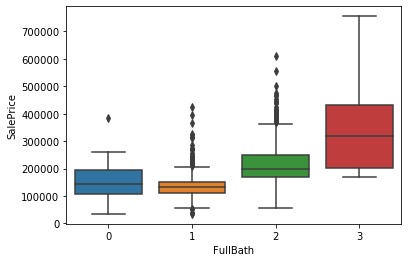

In [25]:
sns.boxplot(pre_data.FullBath,pre_data.SalePrice)
plt.show()

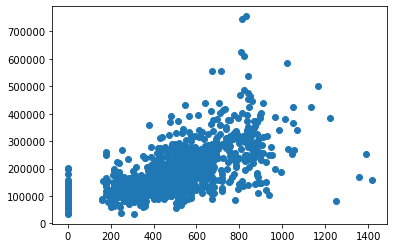

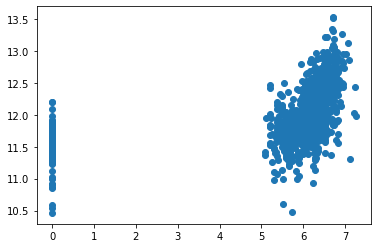

In [26]:
plt.scatter(pre_data.GarageArea,pre_data.SalePrice)
plt.show()

plt.scatter(np.log1p(pre_data.GarageArea),np.log(pre_data.SalePrice))
plt.show()

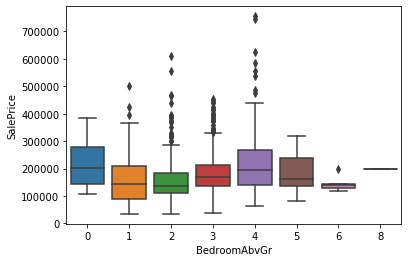

In [27]:
sns.boxplot(pre_data.BedroomAbvGr,pre_data.SalePrice)
plt.show()

In [28]:
pre_data.columns

Index(['SalePrice', 'Neighborhood', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'GrLivArea', 'TotalBsmtSF', 'TotRmsAbvGrd', 'FullBath',
       'GarageArea', 'BedroomAbvGr'],
      dtype='object')

In [29]:
numerical_cols = ['GrLivArea','TotalBsmtSF','TotRmsAbvGrd','GarageArea','YearBuilt','YearRemodAdd','OverallQual']
categorical_cols = ['Neighborhood','OverallCond','FullBath']

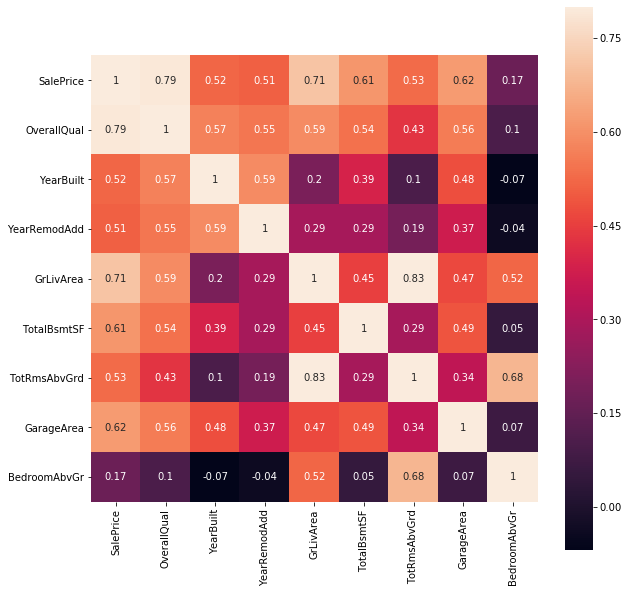

In [30]:
corr_mat = pre_data.drop(categorical_cols,axis=1).corr().round(2)
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_mat, vmax=.8, square=True,annot=True);

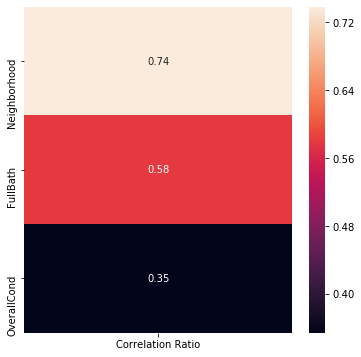

In [31]:
categories = pre_data[categorical_cols]
measurements = pre_data['SalePrice']
eta = cors.correlation_ratio(categories, measurements).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6,6))
sns.heatmap(pd.DataFrame(eta), annot=True)
plt.show()

# Outlier removal

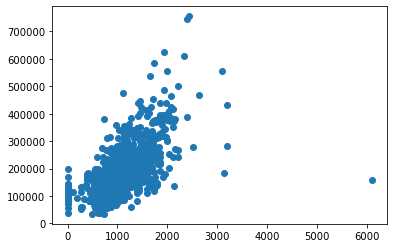

In [32]:
plt.scatter(pre_data.TotalBsmtSF,pre_data.SalePrice)
plt.show()

In [33]:
pre_data[pre_data.TotalBsmtSF > 5000]
pre_data.drop([1298],inplace = True)
pre_data.reset_index(drop=True,inplace=True)

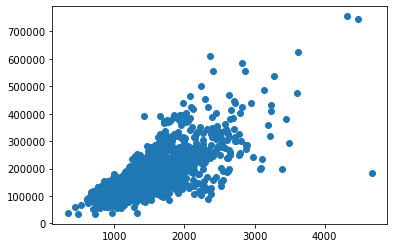

In [34]:
plt.scatter(pre_data.GrLivArea,pre_data.SalePrice)
plt.show()

In [35]:
pre_data[pre_data.GrLivArea > 4000]
pre_data.drop([523],inplace = True)
pre_data.reset_index(drop=True,inplace=True)

# Variable Transformation

In [37]:
feature_data = pre_data.copy()

In [38]:
feature_data.columns

Index(['SalePrice', 'Neighborhood', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'GrLivArea', 'TotalBsmtSF', 'TotRmsAbvGrd', 'FullBath',
       'GarageArea', 'BedroomAbvGr'],
      dtype='object')

In [39]:
# Non-Parametric Transforms

transform_dict = {}
transform_dict['SalePrice'] = np.log
transform_dict['GrLivArea'] = np.log1p
transform_dict['TotalBsmtSF'] = np.log1p
transform_dict['GarageArea'] = np.log1p

In [40]:
def apply_transformation(trans_dict,data):
    for k,v in transform_dict.items():
        data[k]= data[k].apply(v)
    return data
#     print(k,c)

In [41]:
data = apply_transformation(transform_dict,feature_data)

In [43]:
# data = pip_data[['Neighborhood','YearBuilt','SalePrice','FullBath','YearRemodAdd','GrLivArea']]
data.head()

,SalePrice,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GrLivArea,TotalBsmtSF,TotRmsAbvGrd,FullBath,GarageArea,BedroomAbvGr
0,12.247694,CollgCr,7,5,2003,2003,7.444833,6.753438,8,2,6.308098,3
1,12.109011,Veenker,6,8,1976,1976,7.141245,7.141245,6,2,6.133398,3
2,12.317167,CollgCr,7,5,2001,2002,7.488294,6.825460,6,2,6.411818,3
3,11.849398,Crawfor,7,5,1915,1970,7.448916,6.629363,7,1,6.466145,3
4,12.429216,NoRidge,8,5,2000,2000,7.695758,7.044033,9,2,6.729824,4


In [44]:
def get_column_names_from_ColumnTransformer(column_transformer):    
    col_name = []
    for transformer_in_columns in column_transformer.transformers_[:-1]:#the last transformer is ColumnTransformer's 'remainder'
        raw_col_name = transformer_in_columns[2]
        if isinstance(transformer_in_columns[1],Pipeline): 
            transformer = transformer_in_columns[1].steps[-1][1]
        else:
            transformer = transformer_in_columns[1]
        try:
            names = transformer.get_feature_names()
        except AttributeError: # if no 'get_feature_names' function, use raw column name
            names = raw_col_name
        if isinstance(names,np.ndarray): # eg.
            col_name += names.tolist()
        elif isinstance(names,list):
            col_name += names    
        elif isinstance(names,str):
            col_name.append(names)
    return col_name

In [56]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline# define column transformer and set n_jobs to use all cores
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.compose import TransformedTargetRegressor

# Split train and test set
X_train, X_test, y_train, y_test = train_test_split(data.drop('SalePrice',axis=1),
                                    data.SalePrice, test_size=0.3, random_state=0)

#Define column transformations
col_transformer = ColumnTransformer(
                    transformers=[
                        ('mms', MinMaxScaler(), ['YearBuilt','YearRemodAdd']),
                        ('ohe', OneHotEncoder(), ['Neighborhood','TotRmsAbvGrd'
                        ,'FullBath','BedroomAbvGr'])
                    ],
                    remainder='passthrough',
                    n_jobs=-1
                    )

#Choose the ML model
lr = LinearRegression()

#Connect the ML model with the transformations
pipeline = Pipeline([
            ("preprocessing", col_transformer),
            ("lr", lr)
       ])

#Connect the target(y) transformations with the ML model
# model = TransformedTargetRegressor(regressor=pipeline,func=np.log, inverse_func=np.exp)

#Fit the model
pipeline.fit(X_train, y_train);

#Predict the model
train_predictions = pipeline.predict(X_train)
train_score = mean_squared_error(train_predictions,y_train)
train_score

0.019066779750981103

In [55]:
test_predictions = pipeline.predict(X_test)
train_score = mean_squared_error(test_predictions,y_test)
train_score

0.015436537822361922

In [ ]:
#Can't acess the coefs in the end, probably wont use TransformedTargetRegressor

# col = col_transformer.fit(data.drop('SalePrice',axis=1))
# # pipeline.fit(X_train, y_train)

# cols = get_column_names_from_ColumnTransformer(col)
# cols.append('GrLivArea')
# pd.Series(model.regressor.named_steps['lr'].feature_importances_ , index = cols)
model.coef_

In [ ]:
data.groupby('Neighborhood')['SalePrice'].median().sort_values()

In [ ]:
fitted = col_transformer.fit(data)

In [ ]:
from sklearn.metrics import mean_squared_log_error
x_predict = pipe.predict(X_train)
# train_score = np.sqrt(mean_squared_log_error(np.exp(yTest), np.exp(test_predictions)))
train_score = mean_squared_log_error(x_predict,y_train)
train_score

In [ ]:
t_cols = get_column_names_from_ColumnTransformer(col_transformer)

In [ ]:
fitted = col_transformer.fit_transform(data)

In [ ]:


col_transformer.get_params

In [ ]:
dummies = pd.get_dummies(pre_data['Neighborhood'])
pre_data = pd.concat([pre_data,dummies], axis=1)
pre_data.drop('Neighborhood',axis=1, inplace = True)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
data = pre_data['YearBuilt'].values.reshape(-1, 1)
scaler = MinMaxScaler()
scaler.fit(data)
scaled_data = pd.DataFrame(scaler.transform(data),columns=['YearBuilt'])
scaled_data

data = pre_data['YearBuilt'].values.reshape(-1, 1)
scaler = MinMaxScaler()
scaler.fit(data)
scaled_data = pd.DataFrame(scaler.transform(data))

In [ ]:
import pandas as pd

known_categories = ['Sedan','Coupe','Limo'] # from training set

car_type = pd.Series(['Sedan','Ferrari']) # new category in production, 'Ferrari'

car_type = pd.Categorical(car_type, categories = known_categories)

pd.get_dummies(car_type)